In [2]:
import numpy as np
import pandas as pd
import gzip

In [14]:
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

path = './Rumprobieren/data/data.json.gz'
df = getDF(path)


In [15]:
df.shape

(10261, 9)

In [16]:
df.describe()

,overall,unixReviewTime
count,10261.000000,1.026100e+04
mean,4.488744,1.360606e+09
std,0.894642,3.779735e+07
min,1.000000,1.095466e+09
25%,4.000000,1.343434e+09
50%,5.000000,1.368490e+09
75%,5.000000,1.388966e+09
max,5.000000,1.405987e+09


In [17]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [18]:
df.size

92349

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10261 entries, 0 to 10260
Data columns (total 9 columns):
reviewerID        10261 non-null object
asin              10261 non-null object
reviewerName      10234 non-null object
helpful           10261 non-null object
reviewText        10261 non-null object
overall           10261 non-null float64
summary           10261 non-null object
unixReviewTime    10261 non-null int64
reviewTime        10261 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 801.6+ KB


In [19]:
df.describe(include="all")

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
count,10261,10261,10234,10261,10261,10261.000000,10261,1.026100e+04,10261
unique,1429,900,1397,269,10255,NaN,8852,NaN,1570
top,ADH0O8UVJOT10,B003VWJ2K8,Amazon Customer,"[0, 0]",,NaN,Great,NaN,"01 22, 2013"
freq,42,163,66,6796,7,NaN,42,NaN,40
mean,NaN,NaN,NaN,NaN,NaN,4.488744,NaN,1.360606e+09,NaN
std,NaN,NaN,NaN,NaN,NaN,0.894642,NaN,3.779735e+07,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,1.095466e+09,NaN
25%,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,1.343434e+09,NaN
50%,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,1.368490e+09,NaN
75%,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,1.388966e+09,NaN


5.0    6938
4.0    2084
3.0     772
2.0     250
1.0     217
Name: overall, dtype: int64


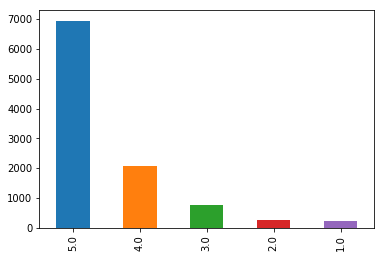

In [20]:
print(df["overall"].value_counts())
df["overall"].value_counts().plot.bar();

In [21]:
print(df["asin"].value_counts())

B003VWJ2K8    163
B0002E1G5C    143
B0002F7K7Y    116
B003VWKPHC    114
B0002H0A3S     93
B0002CZVXM     74
B0006NDF8A     71
B0009G1E0K     69
B0002E2KPC     68
B0002GLDQM     67
B004XNK7AI     65
B005FKF1PY     63
B00646MZHK     62
B001PGXHX0     58
B0002GMGYA     58
B0018TIADQ     57
B000978D58     57
B001PGXKC8     55
B0002D0CEO     55
B000068NW5     52
B0002IHFVM     49
B000RNB720     47
B0002CZW0Y     46
B0002OOMU8     46
B0002M6CVC     46
B0002E2XCW     45
B0002E3CHC     44
B000PO30QM     44
B005CX4GLE     42
B0002D0E8S     41
             ... 
B0018PZR86      5
B001ELP5WM      5
B0002CZVB4      5
B000RVYPQ2      5
B001C9R5P6      5
B00923G9Q0      5
B005J9FS0Y      5
B001L8KE06      5
B000WYCS7M      5
B001L8IKLG      5
B000CBE3GE      5
B0002E37MM      5
B0006ZXFZQ      5
B0007WQZGY      5
B009GT0KNI      5
B0002E3A8S      5
B0002GOK08      5
B009MIBIWK      5
B000EEHD4I      5
B005E0CPNG      5
B000UMFQHA      5
B003AM913C      5
B009AS1FLG      5
B00CK2FOZM      5
B000MO2QJM

In [22]:
# Durchschnittliche Anzahl Bewertungen pro Artikel
df["asin"].count()/(df["asin"].value_counts().count())

11.401111111111112

In [23]:
# Durchschnittliche Bewertung | Median der Sterne
df["overall"].sum()/df.shape[0]

4.488743787155248

In [4]:
import numpy as np
import pandas as pd
import gzip

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

def Datenverstaendnis(path):
    df = getDF(path)

    # Sterneverteilung
    a=df["overall"].value_counts()

    # Durchschnittliche Anzahl Bewertungen pro Artikel
    b=df["asin"].count()/(df["asin"].value_counts().count())

    # Durchschnittliche Bewertung
    c=df["overall"].sum()/df.shape[0]

    print("Durchschnittliche Anzahl Bewertungen pro Artikel:")
    print()
    print(b)
    print()
    print()
    print("Sterneverteilung:")
    print()
    print(a)
    print()
    print()
    print("Durchschnittliche Bewertung:")
    print()
    print(c)
    print()
    print()
    df.shape
    print("Informationen der Daten:")
    print()
    print(df.info())
    print()
    print()
    print("Beschreibung der Daten:")
    print()
    print(df.describe())
    print()
    print()
    print("Die ersten Daten der Daten:")
    print(df.head())

Datenverstaendnis('./Rumprobieren/data/data.json.gz')

Durchschnittliche Anzahl Bewertungen pro Artikel:

11.401111111111112


Sterneverteilung:

5.0    6938
4.0    2084
3.0     772
2.0     250
1.0     217
Name: overall, dtype: int64


Durchschnittliche Bewertung:

4.488743787155248


Informationen der Daten:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10261 entries, 0 to 10260
Data columns (total 9 columns):
reviewerID        10261 non-null object
asin              10261 non-null object
reviewerName      10234 non-null object
helpful           10261 non-null object
reviewText        10261 non-null object
overall           10261 non-null float64
summary           10261 non-null object
unixReviewTime    10261 non-null int64
reviewTime        10261 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 801.6+ KB
None


Beschreibung der Daten:

            overall  unixReviewTime
count  10261.000000    1.026100e+04
mean       4.488744    1.360606e+09
std        0.894642    3.779735e+07
min        1.000000    1.095466e+09